In [1]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely.geometry import Point, MultiPolygon
# gdf.to_file("my_file.geojson", driver="GeoJSON")

In [26]:
templos = pd.read_csv('lat_lng_base_de_interesse.csv')
bairros = pd.read_csv('../Categorização/bairrosFortaleza2019.csv')
pop2020 = pd.read_csv('../Categorização/pop2020.csv')

bairros['the_geom'] = gpd.GeoSeries.from_wkt(bairros['the_geom'])
gBairros = gpd.GeoDataFrame(bairros, geometry='the_geom')


# Merge Bairros e População:

In [27]:
gBairros.sort_values(by=['bairro'],ascending = True).head(2)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,qtd_arenin,qtd_ecopon,fonte,anoref,epsg_codif,FONTE,ANO_REF,DESCRICAO,NOME,FLA_LEG
110,vw_fortaleza_limites_administrativos_2020.fid-...,91,91,"MULTIPOLYGON (((-38.51707 -3.76988, -38.51704 ...",Aerolândia,SER VI,1104918.580,110.492,1.105,4820.932,...,0,0,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 6<...,Aerolândia,Bairros de Fortaleza
62,vw_fortaleza_limites_administrativos_2020.fid-...,92,92,"MULTIPOLYGON (((-38.55038 -3.77092, -38.55038 ...",Aeroporto,SER IV,6232707.614,623.271,6.233,13270.685,...,0,0,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 4<...,Aeroporto,Bairros de Fortaleza


In [28]:
gBairros['fbairro'] = gBairros['bairro'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.lower()

In [29]:
pop2020.head(5)

,BAIRRO,0-9,10-18,19-59,60+,TOTAL
0,AEROLANDIA,1614,1949,7537,1345,12445
1,AEROPORTO,1549,1899,5466,528,9442
2,ALDEOTA,3694,5064,29621,8032,46411
3,ALTO DA BALANCA,1861,2027,8391,1760,14039
4,ALVARO WEYNE,3367,3891,15594,3103,25955


In [30]:
pop2020['fbairro'] = pop2020['BAIRRO'].str.lower()
pop2020.head(5)

,BAIRRO,0-9,10-18,19-59,60+,TOTAL,fbairro
0,AEROLANDIA,1614,1949,7537,1345,12445,aerolandia
1,AEROPORTO,1549,1899,5466,528,9442,aeroporto
2,ALDEOTA,3694,5064,29621,8032,46411,aldeota
3,ALTO DA BALANCA,1861,2027,8391,1760,14039,alto da balanca
4,ALVARO WEYNE,3367,3891,15594,3103,25955,alvaro weyne


In [31]:
pd.merge(gBairros, pop2020, on ='fbairro').shape

(106, 42)

In [32]:
# pd.merge(gBairros, pop2020, left_on ='bairro', right_on='BAIRRO')
teste_merge_pop = pd.merge(gBairros, pop2020, on ='fbairro', how='outer', indicator=True)
teste_merge_pop.head(2)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,NOME,FLA_LEG,fbairro,BAIRRO,0-9,10-18,19-59,60+,TOTAL,_merge
0,vw_fortaleza_limites_administrativos_2020.fid-...,95.0,95.0,"MULTIPOLYGON (((-38.53142 -3.79758, -38.53125 ...",Boa Vista/Castelão,SER VI,2957500.947,295.750,2.958,8249.362,...,Boa Vista/Castelão,Bairros de Fortaleza,boa vista/castelao,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,vw_fortaleza_limites_administrativos_2020.fid-...,40.0,40.0,"MULTIPOLYGON (((-38.59200 -3.73483, -38.59198 ...",Antônio Bezerra,SER III,2196940.509,219.694,2.197,6614.089,...,Antônio Bezerra,Bairros de Fortaleza,antonio bezerra,ANTONIO BEZERRA,3643.0,4356.0,17225.0,3092.0,28316.0,both


In [33]:
print(";\t".join(teste_merge_pop.loc[teste_merge_pop._merge == 'right_only']['fbairro'].to_list()))
# pop2020

boa vista;	bom sucesso;	guajiru;	lourdes;	luciano cavalcante;	palmeiras;	pan americano;	parque genibau;	planalto airton senna;	praia do meireles;	sao gerardo/alagadico;	sao joao do tauape;	sapiranga coite;	vila ellery;	vila manoel satiro


In [34]:
print(";\t".join(teste_merge_pop.loc[teste_merge_pop._merge == 'left_only']['fbairro'].to_list()))
# gBairros

boa vista/castelao;	ellery;	sao gerardo;	meireles;	manoel satiro;	engenheiro luciano cavalcante;	de lourdes;	bonsucesso;	panamericano;	genibau;	planalto ayrton senna;	guajeru;	conjunto palmeiras;	tauape;	sapiranga/coite


In [35]:
# ref = {}
# lista = teste_merge_pop.loc[teste_merge_pop._merge == 'left_only']['fbairro'].to_list();
# for p in lista:
#     ref[p] = ''
# ref 


ref = {'boa vista/castelao': 'boa vista',
 'ellery': 'vila ellery',
 'sao gerardo': 'sao gerardo/alagadico',
 'meireles': 'praia do meireles',
 'manoel satiro': 'vila manoel satiro',
 'engenheiro luciano cavalcante': 'luciano cavalcante',
 'de lourdes': 'lourdes',
 'bonsucesso': 'bom sucesso',
 'panamericano': 'pan americano',
 'genibau': 'parque genibau',
 'planalto ayrton senna': 'planalto airton senna',
 'guajeru': 'guajiru',
 'conjunto palmeiras': 'palmeiras',
 'tauape': 'sao joao do tauape',
 'sapiranga/coite': 'sapiranga coite'}


print(ref)

gBairros = gBairros.replace({'fbairro':ref})

{'boa vista/castelao': 'boa vista', 'ellery': 'vila ellery', 'sao gerardo': 'sao gerardo/alagadico', 'meireles': 'praia do meireles', 'manoel satiro': 'vila manoel satiro', 'engenheiro luciano cavalcante': 'luciano cavalcante', 'de lourdes': 'lourdes', 'bonsucesso': 'bom sucesso', 'panamericano': 'pan americano', 'genibau': 'parque genibau', 'planalto ayrton senna': 'planalto airton senna', 'guajeru': 'guajiru', 'conjunto palmeiras': 'palmeiras', 'tauape': 'sao joao do tauape', 'sapiranga/coite': 'sapiranga coite'}


In [36]:
gBairros_pop = pd.merge(gBairros, pop2020, on ='fbairro')
gBairros_pop.head(1)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,DESCRICAO,NOME,FLA_LEG,fbairro,BAIRRO,0-9,10-18,19-59,60+,TOTAL
0,vw_fortaleza_limites_administrativos_2020.fid-...,95,95,"MULTIPOLYGON (((-38.53142 -3.79758, -38.53125 ...",Boa Vista/Castelão,SER VI,2957500.947,295.75,2.958,8249.362,...,<br><div><strong>Regional 2020: </strong>SR 8<...,Boa Vista/Castelão,Bairros de Fortaleza,boa vista,BOA VISTA,2187,2185,8043,1003,13418


In [37]:
gBairros_pop.to_file("bairrosFortaleza.geojson", driver="GeoJSON")

# Merge Templos/Bairros - Atribuindo um bairro para cada templo:

In [38]:
# gBairros.filter(['id','the_geom','bairro']).head(5)
gBairros.head(2)

,FID,GID,id,the_geom,bairro,regional,area_m2,area_ha,area_km2,perimetr_m,...,qtd_ecopon,fonte,anoref,epsg_codif,FONTE,ANO_REF,DESCRICAO,NOME,FLA_LEG,fbairro
0,vw_fortaleza_limites_administrativos_2020.fid-...,95,95,"MULTIPOLYGON (((-38.53142 -3.79758, -38.53125 ...",Boa Vista/Castelão,SER VI,2957500.947,295.750,2.958,8249.362,...,0,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 8<...,Boa Vista/Castelão,Bairros de Fortaleza,boa vista
1,vw_fortaleza_limites_administrativos_2020.fid-...,40,40,"MULTIPOLYGON (((-38.59200 -3.73483, -38.59198 ...",Antônio Bezerra,SER III,2196940.509,219.694,2.197,6614.089,...,1,Iplanfor,2019,EPSG: 31984 (SIRGAS 2000 - UTM 24S); Codificaç...,IPLANFOR,2020,<br><div><strong>Regional 2020: </strong>SR 3<...,Antônio Bezerra,Bairros de Fortaleza,antonio bezerra


In [39]:
# gBairros['bairro'].value_counts().head()
templos.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'CNPJ_basico', 'razao_social',
       'natureza_juridica', 'qualificacao_do_responsavel',
       'capital_social_da_empresa', 'porte_da_empresa',
       'ente_federativo_responsavel', 'Matriz ou Filial', 'CNPJ ORDEM',
       'Matriz ou Filial.1', 'Nome Fantasia', 'Situação Cadastral',
       'Data Situação Cadastral', 'Motivo Situação Cadastral', '8', '9',
       'Data início_atividade', 'CNAE Principal', 'CNAE Secundária',
       'Tipo de Logradouro', 'Logradouro', 'Número', 'Complemento', 'Bairro',
       'CEP', 'Estado', 'Cidade', 'DDD', 'Telefone', 'DDD2', 'Telefone2',
       'DDD FAX', 'Fax', 'Email', '28', '29', '_merge', 'End_comp',
       'geocode_result', 'len_busca_google', 'lat_lng', 'lat', 'lng'],
      dtype='object')

In [40]:
templos.filter(['CNPJ_basico','razao_social','Data início_atividade','Situação Cadastral','Data início_atividade','porte_da_empresa','End_comp','lat','lng']).head(5)

,CNPJ_basico,razao_social,Data início_atividade,Situação Cadastral,Data início_atividade,porte_da_empresa,End_comp,lat,lng
0,41396805,IGREJA EVANGELICA BATISTA LIBERDADE,19920205.0,2.0,19920205.0,5.0,"RUA VINTE UM, 10, , JOSE WALTER, 170 60750...",-3.823826,-38.551302
1,41409178,IGREJA BATISTA BEREIANA,19920812.0,2.0,19920812.0,5.0,"RUA CAP VASCONCELOS, 347, , AEROLANDIA, 170 ...",-3.765210,-38.516996
2,41533342,IGREJA VIDA NOVA,20210211.0,2.0,20210211.0,5.0,"AVENIDA AUDIZIO PINHEIRO, 1082, , HENRIQUE JOR...",-3.760812,-38.590167
3,41534812,IGREJA MINISTERIO SAL E LUZ FORTALEZA,20210218.0,2.0,20210218.0,5.0,"RUA CORONEL ALUISIO BORBA, 708, Q009, EN...",-3.778979,-38.490595
4,41585977,ASSOCIACAO DOS PREGADORES DO REINO DE DEUS,20120621.0,2.0,20120621.0,5.0,"RUA OTAVIO PARANHOS, 385, , JARDIM IRACEMA, 17...",-3.721169,-38.585939


In [41]:
templos['Point'] = templos.apply(lambda x: Point(x['lng'],x['lat']), axis=1)

/home/alexandre/anaconda3/envs/credos/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)


In [42]:
templos.filter(['CNPJ_basico','lat','lng','Point']).head(5)

,CNPJ_basico,lat,lng,Point
0,41396805,-3.823826,-38.551302,POINT (-38.5513024 -3.8238258)
1,41409178,-3.765210,-38.516996,POINT (-38.5169955 -3.765209899999999)
2,41533342,-3.760812,-38.590167,POINT (-38.5901665 -3.7608117)
3,41534812,-3.778979,-38.490595,POINT (-38.490595 -3.778978999999999)
4,41585977,-3.721169,-38.585939,POINT (-38.58593949999999 -3.7211692)


In [22]:
# p = Point(-38.557352, -3.766739)
# gBairros[gBairros['the_geom'].contains(p)].iloc[0]['GID']

In [43]:
def getBairro(Point, coluna_desejada_gBairros):
    query = gBairros[gBairros['the_geom'].contains(Point)]
    if query.shape[0] > 0:
#         return query.iloc[0,coluna_desejada_gBairros]
        return query.iloc[0][coluna_desejada_gBairros]
    else:
        return 'Não identificado'
#     if gBairros[gBairros['the_geom'].contains(x['Point'])].shape[0] > 0:
#         return gBairros[gBairros['the_geom'].contains(x['Point'])].iloc[0,4]
#     return 'erro'

In [44]:
templos['bairro_name'] = templos.apply(lambda x: getBairro(x['Point'],4), axis=1)
templos['bairro_GID'] = templos.apply(lambda x: getBairro(x['Point'],'GID'), axis=1)

In [45]:
templos.head()

,Unnamed: 0,Unnamed: 0.1,CNPJ_basico,razao_social,natureza_juridica,qualificacao_do_responsavel,capital_social_da_empresa,porte_da_empresa,ente_federativo_responsavel,Matriz ou Filial,...,_merge,End_comp,geocode_result,len_busca_google,lat_lng,lat,lng,Point,bairro_name,bairro_GID
0,0,170,41396805,IGREJA EVANGELICA BATISTA LIBERDADE,3220.0,16.0,"0,00",5.0,NaN,1.0,...,both,"RUA VINTE UM, 10, , JOSE WALTER, 170 60750...","{'address_components': [{'long_name': '10', 's...",1,"{'lat': -3.8238258, 'lng': -38.5513024}",-3.823826,-38.551302,POINT (-38.5513024 -3.8238258),Prefeito José Walter,89
1,1,191,41409178,IGREJA BATISTA BEREIANA,3220.0,16.0,"0,00",5.0,NaN,1.0,...,both,"RUA CAP VASCONCELOS, 347, , AEROLANDIA, 170 ...","{'address_components': [{'long_name': '347', '...",1,"{'lat': -3.765209899999999, 'lng': -38.5169955}",-3.765210,-38.516996,POINT (-38.5169955 -3.765209899999999),Alto da Balança,93
2,2,364,41533342,IGREJA VIDA NOVA,3220.0,16.0,"0,00",5.0,NaN,1.0,...,both,"AVENIDA AUDIZIO PINHEIRO, 1082, , HENRIQUE JOR...","{'address_components': [{'long_name': '1082', ...",1,"{'lat': -3.7608117, 'lng': -38.5901665}",-3.760812,-38.590167,POINT (-38.5901665 -3.7608117),Henrique Jorge,45
3,3,366,41534812,IGREJA MINISTERIO SAL E LUZ FORTALEZA,3220.0,16.0,"0,00",5.0,NaN,1.0,...,both,"RUA CORONEL ALUISIO BORBA, 708, Q009, EN...","{'address_components': [{'long_name': 'q009', ...",1,"{'lat': -3.778978999999999, 'lng': -38.490595}",-3.778979,-38.490595,POINT (-38.490595 -3.778978999999999),Engenheiro Luciano Cavalcante,58
4,4,433,41585977,ASSOCIACAO DOS PREGADORES DO REINO DE DEUS,3220.0,16.0,"0,00",5.0,NaN,4.0,...,both,"RUA OTAVIO PARANHOS, 385, , JARDIM IRACEMA, 17...","{'address_components': [{'long_name': '385', '...",1,"{'lat': -3.7211692, 'lng': -38.58593949999999}",-3.721169,-38.585939,POINT (-38.58593949999999 -3.7211692),Jardim Iracema,21


In [49]:
templos.loc[templos.Bairro != templos.bairro_name].filter(['end','Bairro','bairro_name'])

,Bairro,bairro_name
0,JOSE WALTER,Prefeito José Walter
1,AEROLANDIA,Alto da Balança
2,HENRIQUE JORGE,Henrique Jorge
3,ENGENHEIRO LUCIANO CAVALCANTE,Engenheiro Luciano Cavalcante
4,JARDIM IRACEMA,Jardim Iracema
...,...,...
2746,PARANGABA,Parangaba
2747,AMADEU FURTADO,Amadeu Furtado
2748,MESSEJANA,Não identificado
2749,MESSEJANA,Messejana


In [50]:
templos.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'CNPJ_basico', 'razao_social',
       'natureza_juridica', 'qualificacao_do_responsavel',
       'capital_social_da_empresa', 'porte_da_empresa',
       'ente_federativo_responsavel', 'Matriz ou Filial', 'CNPJ ORDEM',
       'Matriz ou Filial.1', 'Nome Fantasia', 'Situação Cadastral',
       'Data Situação Cadastral', 'Motivo Situação Cadastral', '8', '9',
       'Data início_atividade', 'CNAE Principal', 'CNAE Secundária',
       'Tipo de Logradouro', 'Logradouro', 'Número', 'Complemento', 'Bairro',
       'CEP', 'Estado', 'Cidade', 'DDD', 'Telefone', 'DDD2', 'Telefone2',
       'DDD FAX', 'Fax', 'Email', '28', '29', '_merge', 'End_comp',
       'geocode_result', 'len_busca_google', 'lat_lng', 'lat', 'lng', 'Point',
       'bairro_name', 'bairro_GID'],
      dtype='object')

In [51]:
templos = templos.filter(['CNPJ_basico','razao_social','Data início_atividade','Situação Cadastral','Data início_atividade','porte_da_empresa','End_comp','lat','lng','bairro_name', 'bairro_GID'])

In [56]:
templos.to_csv('dfReceita_bairros.csv')

In [58]:
templos['bairro_name'].value_counts()

Não identificado     227
Centro               167
Barra do Ceará        73
Jangurussu            68
Messejana             62
                    ... 
Sabiaguaba             2
Aeroporto              2
Couto Fernandes        2
Praia do Futuro I      1
Pedras                 1
Name: bairro_name, Length: 122, dtype: int64

In [69]:
bairros_cont = templos.groupby(['bairro_name']).size().reset_index()

In [70]:
bairros_cont.columns = ['bairro','qtd']

In [71]:
bairros_cont['pct'] = round(bairros_cont['qtd']/819*100,2)

In [72]:
bairros_cont['qtd'].mean()

22.549180327868854

In [73]:
bairros_cont['pct'].mean()

2.753442622950821

<AxesSubplot:ylabel='Frequency'>

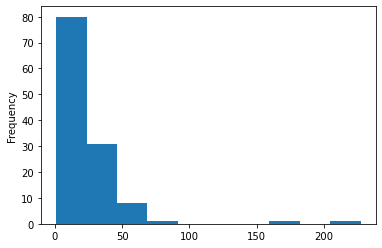

In [74]:
bairros_cont['qtd'].plot.hist()

In [75]:
bairros_cont.loc[bairros_cont['qtd'] <= 10]

,bairro,qtd,pct
0,Aerolândia,9,1.10
1,Aeroporto,2,0.24
5,Ancuri,6,0.73
7,Aracapé,8,0.98
14,Bom Futuro,3,0.37
19,Cambeba,6,0.73
23,Cidade 2000,7,0.85
25,Coaçu,7,0.85
26,Cocó,7,0.85
31,Couto Fernandes,2,0.24
